#This project describe about how to Create a table named studentmarks in Mysql . 
#Choosing the column name and its datatypes accordingly to the students_marks .csv which is present in github.
#Link-https://github.com/dsrscientist/dataset1/blob/master/student_marks.csv
#Then loading the data of students_marks.csv into mysql database by load local infile command.
#Then, using jupyter notebook ,make a connection with mysql ,fetch the data of students marks in notebook. 
#Once done, will making evaluation of data using all steps of EDA.

# Step1: Creating a table in Mysql for student marks

show databases;
use studentdb;
show tables;
create table studentmarks(Name varchar(20), Gender char(1), DOB varchar(15), 
                           Maths int, Physiscs int, Chemistry int, English int, 
                           Biology int, Economics int, History int, Civics int);
desc studentmarks;
SHOW GLOBAL VARIABLES like 'local_infile';
set global local_infile=true;
SHOW GLOBAL VARIABLES like 'local_infile';
load data local infile 'D:/Data Trained/Evaluation Projects/student_marks.csv' into table studentmarks fields terminated by ',' lines terminated by '\r\n';

select * from studentmarks;

# Step2: Connecting Mysql through jupyter notebook using pandas library

In [7]:
#connecting mysql
!pip install mysql-connector-python

In [2]:
#imorting mysql connector
import mysql.connector

In [15]:
# connect to mysql
import pandas as pd
con=mysql.connector.connect(
host="localhost",
port=3306,
user="root",
password="Ajitkumar123#",
database="studentdb")

In [16]:
#fetching the data
studentmarks=pd.read_sql_query("select * from studentmarks",con)
studentmarks

,Name,Gender,DOB,Maths,Physiscs,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


# Step3:Exploratory Data Analysis of Student Marks

In [19]:
#importing matplotlib and seaborn for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

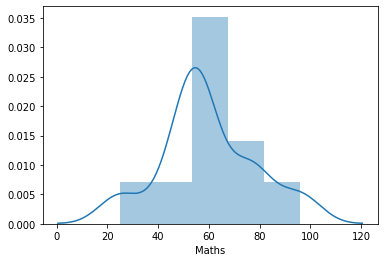

In [20]:
#lets see the Math marks distribution among all the students
sns.distplot(studentmarks['Maths'])

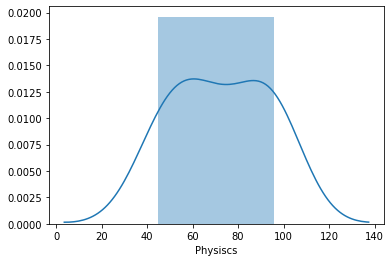

In [22]:
#lets see the Physics marks distribution among all the students
sns.distplot(studentmarks['Physiscs'])

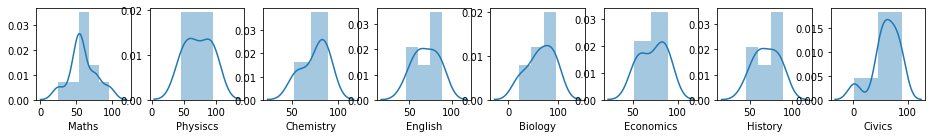

In [26]:
#lets see the all the subject marks distribution among all the students
stdmarks=studentmarks.drop(columns=['Name','Gender','DOB'],axis=1)
plt.figure(figsize=(20,20))
collist=stdmarks.columns.values
ncol=10
nrows=10
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(stdmarks[collist[i]])

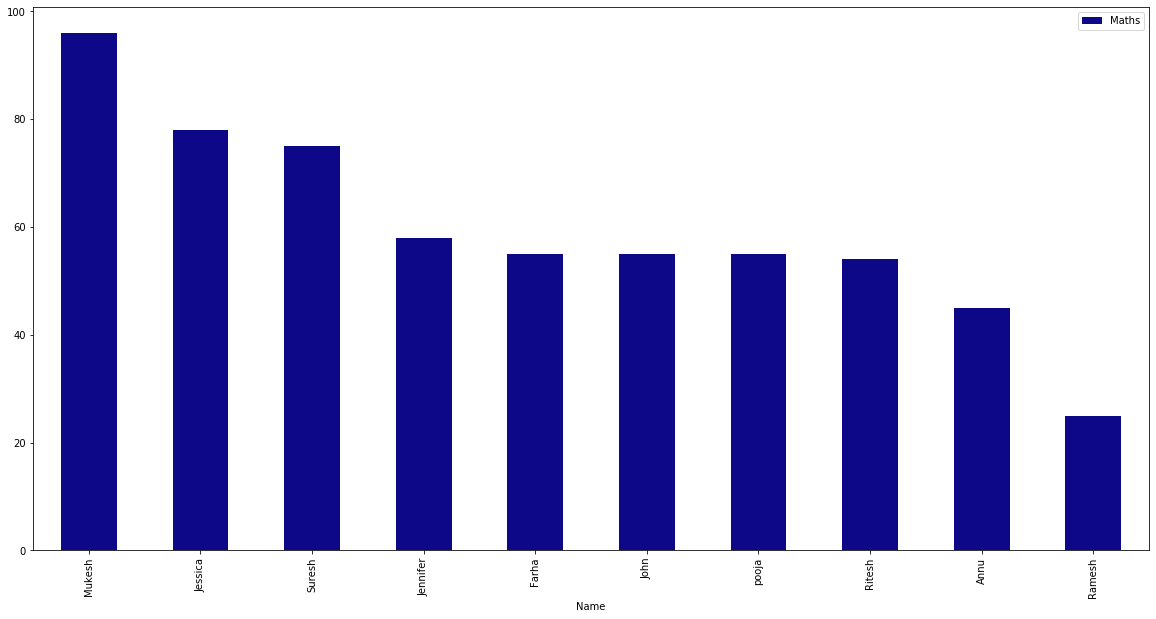

In [41]:
#lets math marks for all the student
Math_Marks=studentmarks[['Name','Maths']].groupby('Name').sum().sort_values('Maths',ascending=False)
Math_Marks.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

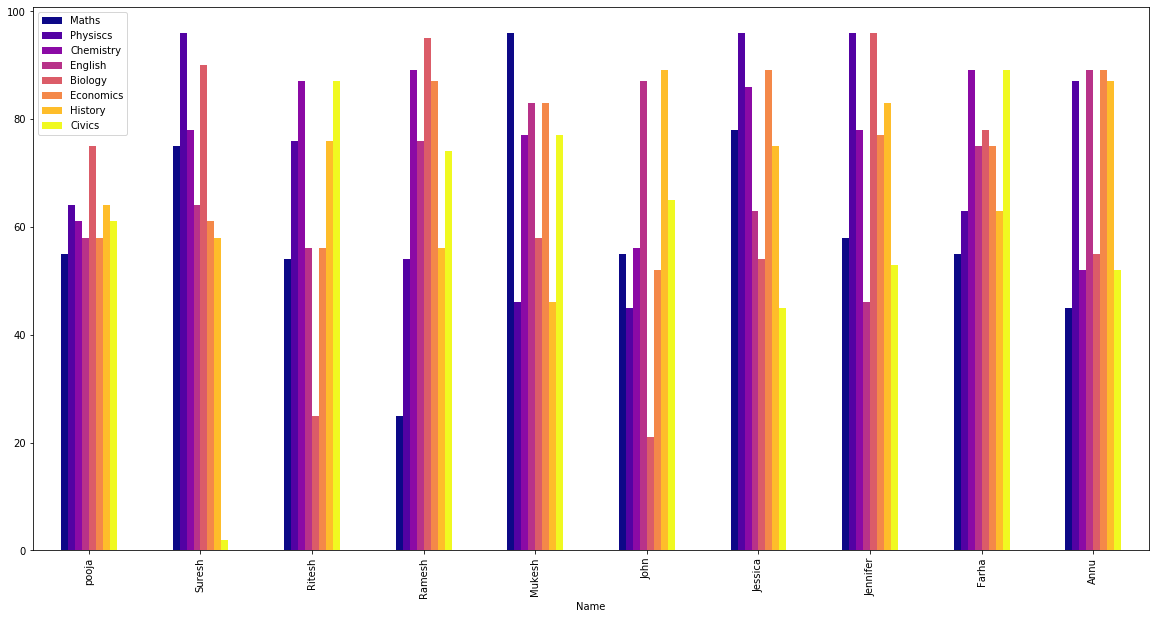

In [42]:
#lets all students all marks
All_Marks=studentmarks[['Name','Maths','Physiscs','Chemistry','English','Biology','Economics','History','Civics']].groupby('Name').sum().sort_values('Name',ascending=False)
All_Marks.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

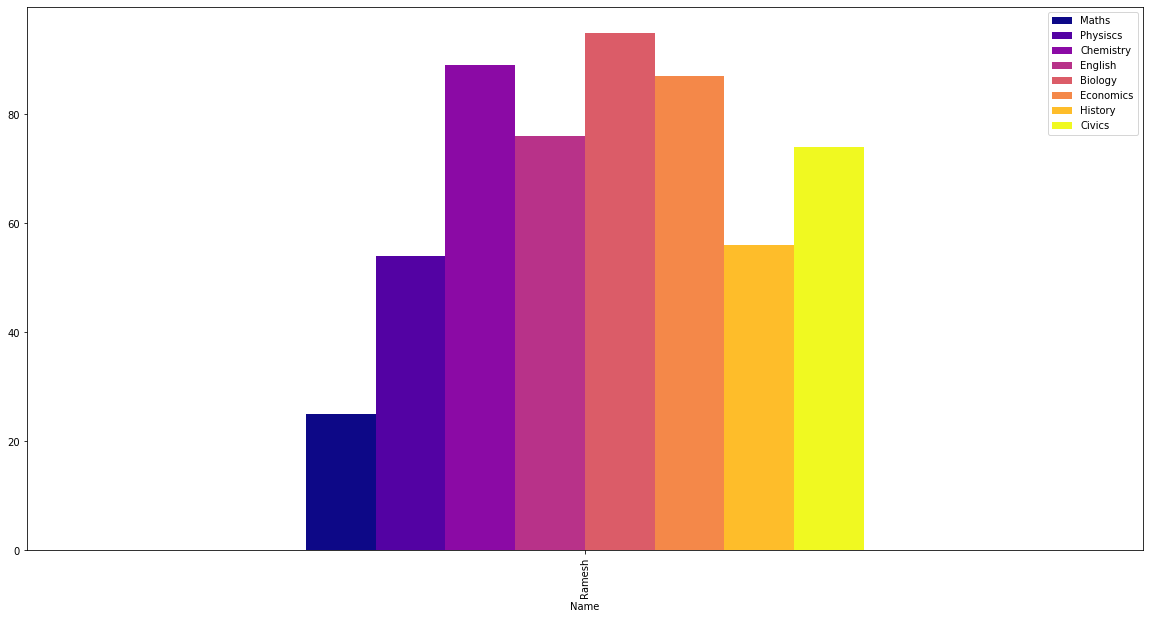

In [43]:
#lets see the marks about a perticular student

Ramesh_Marks=studentmarks.loc[studentmarks['Name']=='Ramesh']

RameshMarks=Ramesh_Marks[['Name','Maths','Physiscs','Chemistry','English','Biology','Economics','History','Civics']].groupby('Name').sum().sort_values('Name',ascending=False)
RameshMarks.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()


In [45]:
studentmarks.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physiscs', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

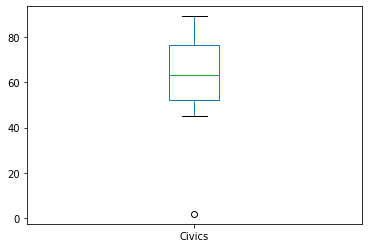

In [51]:
#lets see the outliers of any paerticular marks
studentmarks['Civics'].plot.box()

#so here there are only one outlier present.

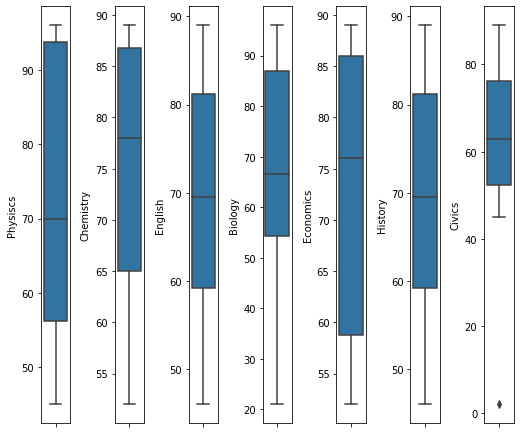

In [57]:
#lets check the outliers for all the marks

stdmarks=studentmarks.drop(columns=['Name','Gender','DOB'],axis=1)

collist=stdmarks.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(stdmarks[collist[i]],orient='v')
    plt.tight_layout()   


In [44]:
#lets check the description of data
studentmarks.describe()

,Maths,Physiscs,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000
